# Set up your notebook

In [10]:
# import libraries
# set up plot configurations (if required)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score
%matplotlib inline


In [64]:
titanic = pd.read_csv("../assets/titanic.csv")

# Executive Summary

- Come back to this after your analysis has been completed.

Markdown 
LaTeX: α2

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.

## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

In [65]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
   # Survived: survived (0 = no; 1 = yes)
   # Pclass: Class (1 = first; 2 = second; 3 = third)
   # Name: Name
   # Sex: Sex
   #  Age: Age
   #  Sibsp: Number of siblings or spouses on the Titanic
   # Parch: Number of parents or children on the Titanic
   #   Ticket: ticket number
   #  Fare:  fare
   # Cabin: Cabin number
   #  Embarked: location embarked(C = Cherbourg; Q = Queenstown; S = Southampton)

In [34]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
#It is a list of passengers, which indicates who has survived, 0 meaning the person did not surve, and 1 meaning survived. 

In [ ]:
# There are also data for each passenger, from their class, name, sex, age, SibSp, Parch, ticket number, fare, cabin number, and embarkation status

## Risks and Assumptions

In [26]:
# The assumpion is that the data set is accurately recorded.  

In [27]:
# Another assumption is that the data set is representative of all passengers in the Titanic

## Hypothesis

Null hypothesis, $H_0$: That the class, sex, age, and fare paid has no influence on whether the passenger survived. 

Alternative hypothesis, $H_1$: That the class, sex, age, and fare has an influence on whether the passenger survived. 

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


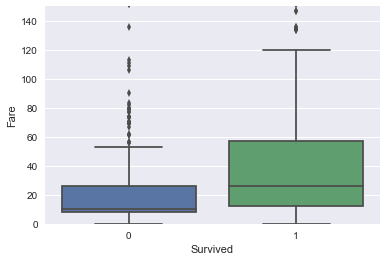

In [79]:
sns.boxplot("Survived", "Fare", data=titanic)
plt.ylim(0,150)
plt.show()

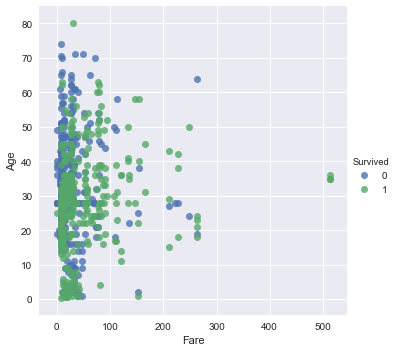

In [81]:
sns.lmplot(x="Fare", y="Age", hue="Survived", data=titanic, fit_reg=False)

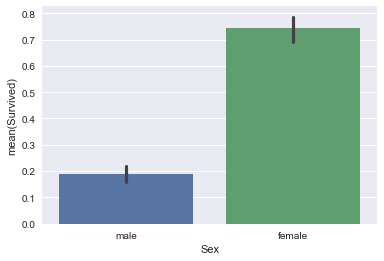

In [41]:
sns.barplot(x="Sex", y="Survived", data=titanic)

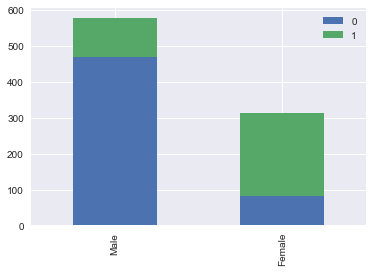

In [57]:
survived_sex=titanic[titanic['Sex']=='male']['Survived'].value_counts()
dead_sex=titanic[titanic['Sex']=='female']['Survived'].value_counts()
df_survived=pd.DataFrame([survived_sex, dead_sex])
df_survived.index=['Male','Female']
df_survived.plot(kind='bar',stacked=True)

A much larger proportion of men did not survive (80%), as compared to women(20%). 

# Data Cleaning

- Prepare your dataset for modeling

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing


label_encoder=preprocessing.LabelEncoder()



In [69]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex']=label_encoder.fit_transform(titanic['Sex'].astype('str'))
titanic['Embarked']=label_encoder.fit_transform(titanic['Embarked'].astype('str'))

In [71]:
titanic_df = titanic.drop(['Name','SibSp','Parch','Ticket', 'Cabin', 'Embarked'], axis=1)

titanic_df = titanic_df.dropna()

titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
Fare           891
dtype: int64

# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

In [74]:
X = titanic_df.drop(['Survived'], axis=1).values
y = titanic_df['Survived'].values



In [77]:

from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)



In [78]:
classifier_set = tree.DecisionTreeClassifier(max_depth=10)

classifier_set.fit (X_train, y_train)
classifier_set.score (X_test, y_test)



0.78770949720670391

# What does your analysis show?

- What are your findings (in relation to your problem statement)?

In [ ]:
#The result of 0.787, means that the model correctly predicted the survival 78.7% of the test set. 

# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

In [ ]:
#Cabin and Age columns

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)